In [1]:
#IMPORT ALL THE REQUIRED LIBERARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Optional: for warnings suppression
import warnings
warnings.filterwarnings('ignore')

# Set visualizations inline
%matplotlib inline

In [2]:
# Load the dataset (Dictionary for ICD-9 diagnosis codes.)
icd_diag = pd.read_csv('D_ICD_DIAGNOSES.csv.gz')

# Preview the dataset
icd_diag.head()


,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [3]:
# Check data types and non-null counts
icd_diag.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       14567 non-null  int64 
 1   ICD9_CODE    14567 non-null  object
 2   SHORT_TITLE  14567 non-null  object
 3   LONG_TITLE   14567 non-null  object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [4]:
# Checking missing values in each column
missing_values = icd_diag.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [5]:
# Check duplicates
duplicates = icd_diag.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')


Total duplicate rows: 0


In [6]:
# Drop duplicates if necessary
icd_diag.drop_duplicates(inplace=True)

In [7]:
# Encode categorical data into numeric format
categorical_cols = ['SHORT_TITLE', 'LONG_TITLE']
for col in categorical_cols:
    icd_diag[col] = icd_diag[col].fillna('missing')  # handle NaNs
    icd_diag[col + '_CAT'] = icd_diag[col].astype('category').cat.codes

In [8]:
# Save cleaned version
icd_diag_cleaned = icd_diag.copy()
icd_diag_cleaned.to_csv('d_icd_diagnoses_cleaned.csv', index=False)


In [9]:
# Load again if needed
icd_diag_cleaned = pd.read_csv('d_icd_diagnoses_cleaned.csv')

# Verify first
print(icd_diag_cleaned.head())


   ROW_ID ICD9_CODE               SHORT_TITLE  \
0     174     01166     TB pneumonia-oth test   
1     175     01170    TB pneumothorax-unspec   
2     176     01171   TB pneumothorax-no exam   
3     177     01172  TB pneumothorx-exam unkn   
4     178     01173  TB pneumothorax-micro dx   

                                          LONG_TITLE  SHORT_TITLE_CAT  \
0  Tuberculous pneumonia [any form], tubercle bac...            13108   
1              Tuberculous pneumothorax, unspecified            13115   
2  Tuberculous pneumothorax, bacteriological or h...            13113   
3  Tuberculous pneumothorax, bacteriological or h...            13116   
4  Tuberculous pneumothorax, tubercle bacilli fou...            13112   

   LONG_TITLE_CAT  
0           13603  
1           13611  
2           13605  
3           13606  
4           13607  


In [10]:
# Then clearly save it again
icd_diag_cleaned.to_csv('d_icd_diagnoses_cleaned.csv', index=False)


In [11]:
# Install and check SDV
!pip install sdv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [12]:
import sdv
print(sdv.__version__)


1.23.0


In [13]:
# Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# STEP 1: Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import os

In [14]:
# STEP 2: Fix multiprocessing on Windows
os.environ["NUMBA_NUM_THREADS"] = "1"
os.environ["JOBLIB_START_METHOD"] = "spawn"


In [15]:
# --- Start of cleaning step ---
icd_diag_cleaned = icd_diag.dropna()  # Drop rows with any NaNs
print(icd_diag_cleaned.head())
icd_diag_cleaned.to_csv('d_icd_diagnoses_cleaned.csv', index=False)

   ROW_ID ICD9_CODE               SHORT_TITLE  \
0     174     01166     TB pneumonia-oth test   
1     175     01170    TB pneumothorax-unspec   
2     176     01171   TB pneumothorax-no exam   
3     177     01172  TB pneumothorx-exam unkn   
4     178     01173  TB pneumothorax-micro dx   

                                          LONG_TITLE  SHORT_TITLE_CAT  \
0  Tuberculous pneumonia [any form], tubercle bac...            13108   
1              Tuberculous pneumothorax, unspecified            13115   
2  Tuberculous pneumothorax, bacteriological or h...            13113   
3  Tuberculous pneumothorax, bacteriological or h...            13116   
4  Tuberculous pneumothorax, tubercle bacilli fou...            13112   

   LONG_TITLE_CAT  
0           13603  
1           13611  
2           13605  
3           13606  
4           13607  


In [16]:
# STEP 3: Reload cleaned data
icd_diag_cleaned = pd.read_csv("d_icd_diagnoses_cleaned.csv")


In [17]:
# STEP 4: Generate metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(icd_diag_cleaned)

# STEP 5: Initialize synthesizer
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    epochs=300
)

In [18]:
# STEP 6: Fit the synthesizer to the data
synthesizer.fit(icd_diag_cleaned)



PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name   Est # of Columns (CTGAN)
ICD9_CODE              14567
SHORT_TITLE            14328
LONG_TITLE             14562
SHORT_TITLE_CAT        11
LONG_TITLE_CAT         11

We recommend preprocessing discrete columns that can have many values, using 'update_transformers'. Or you may drop columns that are not necessary to model. (Exit this script using ctrl-C)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

In [19]:
# STEP 7: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(icd_diag_cleaned))
synthetic_data = synthesizer.sample(num_rows=1000)



In [20]:
# STEP 8: Save synthetic data
synthetic_data.to_csv("synthetic_d_icd_diagnoses.csv", index=False)



In [21]:
# STEP 9: Preview
synthetic_data.head()



,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE,SHORT_TITLE_CAT,LONG_TITLE_CAT
0,1050947,sdv-pii-h2hst,sdv-pii-ewu4j,sdv-pii-vgf9s,7491,12228
1,12480110,sdv-pii-nyqdg,sdv-pii-9jp5y,sdv-pii-pmwix,0,1393
2,2609990,sdv-pii-f8v7m,sdv-pii-orolq,sdv-pii-mnw82,7091,9590
3,16740407,sdv-pii-tyicy,sdv-pii-o6ipa,sdv-pii-arzmr,3851,3855
4,1141216,sdv-pii-1zqpp,sdv-pii-94ewf,sdv-pii-i2zmc,11163,11135


In [ ]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(icd_diag_cleaned)  # includes 'target' now
synthesizer = CTGANSynthesizer(metadata=metadata, epochs=300)
synthesizer.fit(icd_diag_cleaned)



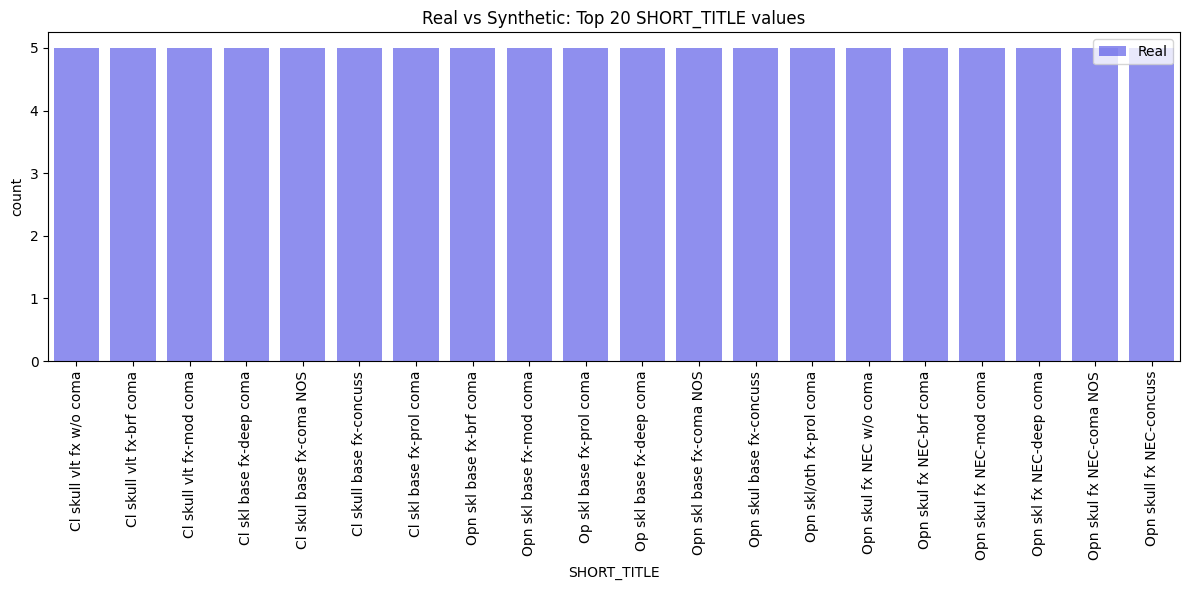

In [ ]:
# Compare distributions of ICD9_CODE_CAT
# Top 20 real short titles
top_titles = icd_diag_cleaned['SHORT_TITLE'].value_counts().nlargest(20).index

# Filter real and synthetic datasets safely
real_filtered = icd_diag_cleaned[icd_diag_cleaned['SHORT_TITLE'].isin(top_titles)]

# Check if SHORT_TITLE exists in synthetic
if 'SHORT_TITLE' in synthetic_data.columns:
    synthetic_filtered = synthetic_data[synthetic_data['SHORT_TITLE'].isin(top_titles)]
else:
    print("SHORT_TITLE not found in synthetic data. Plotting only real data.")
    synthetic_filtered = pd.DataFrame(columns=['SHORT_TITLE'])  # empty fallback

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='SHORT_TITLE', data=real_filtered, color='blue', label='Real', alpha=0.5)

if not synthetic_filtered.empty:
    sns.countplot(x='SHORT_TITLE', data=synthetic_filtered, color='red', label='Synthetic', alpha=0.5)

plt.xticks(rotation=90)
plt.legend()
plt.title("Real vs Synthetic: Top 20 SHORT_TITLE values")
plt.tight_layout()
plt.show()


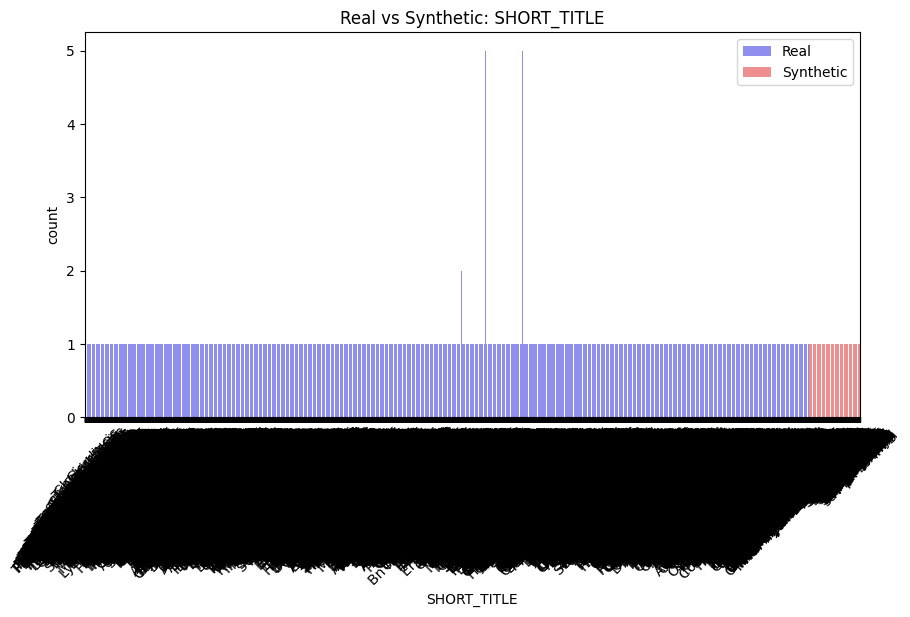

In [ ]:
# Visualization: Compare real vs synthetic distributions
import matplotlib.pyplot as plt
import seaborn as sns

column = 'SHORT_TITLE'

plt.figure(figsize=(10,5))
sns.countplot(x=column, data=icd_diag_cleaned, color='blue', label='Real', alpha=0.5)
sns.countplot(x=column, data=synthetic_data, color='red', label='Synthetic', alpha=0.5)
plt.legend()
plt.title(f"Real vs Synthetic: {column}")
plt.xticks(rotation=45)
plt.show()

# Load synthetic dataset if not already in memory
synthetic = pd.read_csv("synthetic_d_icd_diagnoses.csv")


In [ ]:
# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Predict a binary target — for illustration, use ROW_ID median
features = ['SHORT_TITLE_CAT', 'LONG_TITLE_CAT']
target = 'ROW_ID'

# Create a binary target
icd_diag_cleaned['target'] = (icd_diag_cleaned[target] > icd_diag_cleaned[target].median()).astype(int)
synthetic['target'] = (synthetic[target] > icd_diag_cleaned[target].median()).astype(int)

# Preprocess features
for col in features:
    icd_diag_cleaned[col] = icd_diag_cleaned[col].astype('category').cat.codes
    synthetic[col] = synthetic[col].astype('category').cat.codes

# Real model
X_real = icd_diag_cleaned[features]
y_real = icd_diag_cleaned['target']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3)

model_real = RandomForestClassifier()
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

# Synthetic model
X_syn = synthetic[features]
y_syn = synthetic['target']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_syn, y_syn, test_size=0.3)

model_syn = RandomForestClassifier()
model_syn.fit(Xs_train, ys_train)
syn_acc = accuracy_score(ys_test, model_syn.predict(Xs_test))

print(f" Model accuracy on real data:     {real_acc:.2f}")
print(f" Model accuracy on synthetic data:  {syn_acc:.2f}")

 Model accuracy on real data:     0.87
 Model accuracy on synthetic data:  1.00


In [ ]:
from sdv.single_table import TVAESynthesizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

# Define features and target 
features = ['SHORT_TITLE_CAT','LONG_TITLE_CAT']
target_col = 'ROW_ID' 

# Create binary classification target
icd_diag_cleaned['target'] = (icd_diag_cleaned[target_col] > icd_diag_cleaned[target_col].median()).astype(int)

# Regenerate metadata 
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(icd_diag_cleaned.drop(columns=['target']))

# Fit TVAE (drop target column before fitting)
vae_synthesizer = TVAESynthesizer(metadata=metadata, epochs=300)
vae_synthesizer.fit(icd_diag_cleaned.drop(columns=['target']))

# Sample synthetic data
synthetic_data_vae = vae_synthesizer.sample(num_rows=1000)



In [ ]:
# Add target to synthetic data
synthetic_data_vae['target'] = (synthetic_data_vae[target_col] > icd_diag_cleaned[target_col].median()).astype(int)

# Encode categorical features
for col in features:
    icd_diag_cleaned[col] = icd_diag_cleaned[col].astype('category').cat.codes
    synthetic_data_vae[col] = synthetic_data_vae[col].astype('category').cat.codes

# Train/test split
X_real = icd_diag_cleaned[features]
y_real = icd_diag_cleaned['target']
X_vae = synthetic_data_vae[features]
y_vae = synthetic_data_vae['target']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vae, y_vae, test_size=0.3, random_state=42)

# Train models
model_real = RandomForestClassifier(random_state=42)
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

model_vae = RandomForestClassifier(random_state=42)
model_vae.fit(Xv_train, yv_train)
vae_acc = accuracy_score(yv_test, model_vae.predict(Xv_test))

# Results
print(f"Model accuracy on REAL D_CPT data: {real_acc:.2f}")
print(f"Model accuracy on VAE SYNTHETIC D_CPT: {vae_acc:.2f}")


Model accuracy on REAL D_CPT data: 0.86
Model accuracy on VAE SYNTHETIC D_CPT: 1.00


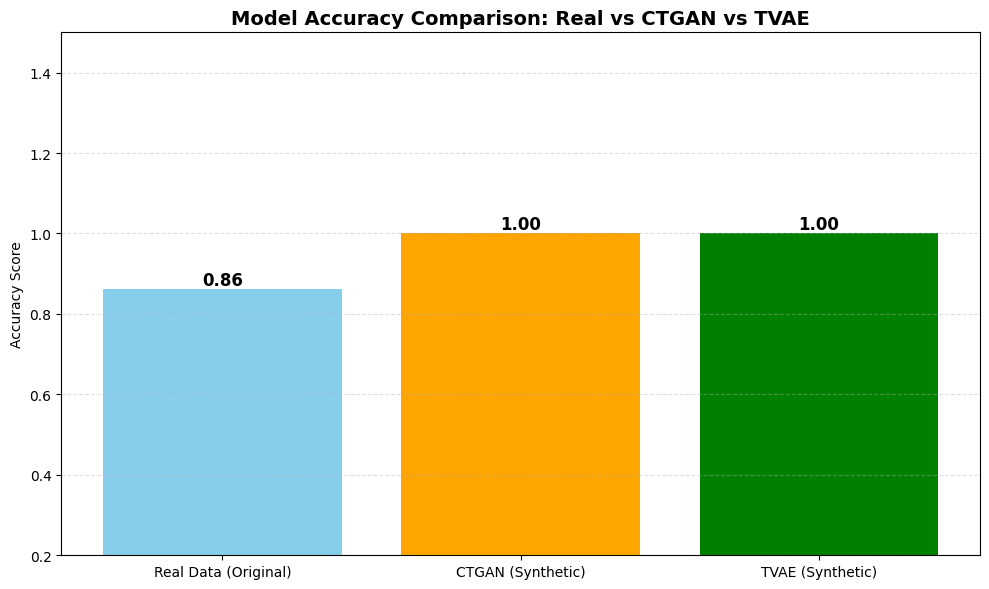

In [ ]:
import matplotlib.pyplot as plt

#  accuracy values
# These are from your previous results:
real_acc = real_acc          # Accuracy on real data using real training
vae_acc = vae_acc           # Accuracy on synthetic VAE data
gan_acc = syn_acc           # Accuracy on synthetic GAN (CTGAN) data

# Prepare bar chart data
labels = ['Real Data (Original)', 'CTGAN (Synthetic)', 'TVAE (Synthetic)']
accuracy_scores = [real_acc, gan_acc, vae_acc]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_scores, color=['skyblue', 'orange', 'green'])

#  chart elements
plt.title('Model Accuracy Comparison: Real vs CTGAN vs TVAE', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score')
plt.ylim(0.2, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
